In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve

True Positives: 26
False Positives: 3
True Negatives: 150
False Negatives: 21

Precision: 0.896551724137931
Recall: 0.5531914893617021


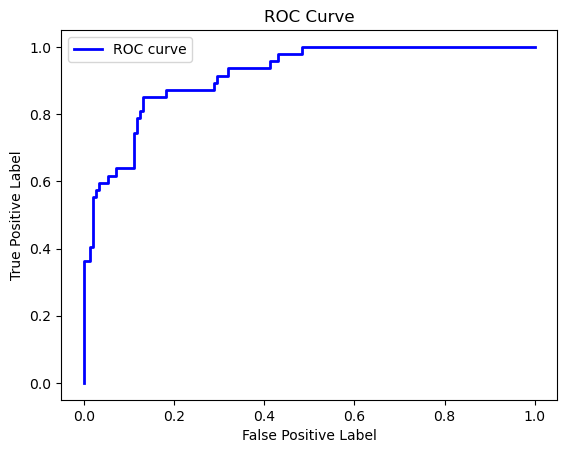

Minimum FPR for TPR >= 90%: 0.29411764705882354


In [90]:
df = pd.read_csv('hw4_data.csv')
model_output = df['model_output'].to_numpy()
true_class = df['true_class'].to_numpy()
prediction = df['prediction'].to_numpy()


TP = ((true_class == 1) & (prediction == 1)).sum()
FP = ((true_class == 0) & (prediction == 1)).sum()
TN = ((true_class == 0) & (prediction == 0)).sum()
FN = ((true_class == 1) & (prediction == 0)).sum()

print("True Positives:", TP)
print("False Positives:", FP)
print("True Negatives:", TN)
print("False Negatives:", FN)

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("\nPrecision:", precision)
print("Recall:", recall)

FPR, TPR, thresholds = roc_curve(true_class, model_output)

plt.figure()
plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve')
plt.xlabel('False Positive Label')
plt.ylabel('True Positive Label')
plt.title('ROC Curve')
plt.legend()
plt.show()

minFPR = np.min(FPR[np.where(TPR >= 0.9)])
print("Minimum FPR for TPR >= 90%:", minFPR)